In [2]:
# Importing the libraries
import psycopg2
import config as creds
import numpy as np # for array operations
import pandas as pd # for working with DataFrames
import requests, io # for HTTP requests and I/O commands
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline

# scikit-learn modules
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.ensemble import RandomForestRegressor # for building the model

In [3]:
def connect():
    
    # Set up a connection to the postgres server.
    conn_string = "host="+ creds.PGHOST +" port="+ "5432" +" dbname="+ creds.PGDATABASE +" user=" + creds.PGUSER \
                  +" password="+ creds.PGPASSWORD
    
    conn = psycopg2.connect(conn_string)
    print("Connected!")

    # Create a cursor object
    cursor = conn.cursor()
    
    return conn, cursor

In [4]:
# Connecting to DB
conn, cursor = connect()

Connected!


In [5]:
# Run SQL          
df_life_expect_all = pd.read_sql('SELECT * FROM le_all', conn)

df_life_expect_all.head()

,country,year_,status,life_expectancy,adult_mortality,population_,under_five_deaths,measles,gdp,hiv_aids,bmi,polio,basic_sanitation,drinking_water,emissions,sani_service
0,Afghanistan,2015,Developing,65.0,263.0,17.3,83,1154,17.2,0.1,19.1,6.0,40.71,52.39,0.172897,40.71
1,Afghanistan,2014,Developing,59.9,271.0,17.5,86,492,17.5,0.1,18.6,58.0,39.37,49.96,0.146236,39.37
2,Afghanistan,2013,Developing,59.9,268.0,17.7,89,430,17.7,0.1,18.1,62.0,38.06,47.56,0.185624,38.06
3,Afghanistan,2012,Developing,59.5,272.0,18.0,93,2787,17.9,0.1,17.6,67.0,36.75,45.19,0.259295,36.75
4,Afghanistan,2011,Developing,59.2,275.0,18.2,97,3013,18.2,0.1,17.2,68.0,35.46,42.84,0.296506,35.46


In [6]:
#drop unneccesary columns
life_expect_df = df_life_expect_all.drop(["country"], axis = 1)
life_expect_df

,year_,status,life_expectancy,adult_mortality,population_,under_five_deaths,measles,gdp,hiv_aids,bmi,polio,basic_sanitation,drinking_water,emissions,sani_service
0,2015,Developing,65.0,263.0,17.3,83,1154,17.2,0.1,19.1,6.0,40.71,52.39,0.172897,40.71
1,2014,Developing,59.9,271.0,17.5,86,492,17.5,0.1,18.6,58.0,39.37,49.96,0.146236,39.37
2,2013,Developing,59.9,268.0,17.7,89,430,17.7,0.1,18.1,62.0,38.06,47.56,0.185624,38.06
3,2012,Developing,59.5,272.0,18.0,93,2787,17.9,0.1,17.6,67.0,36.75,45.19,0.259295,36.75
4,2011,Developing,59.2,275.0,18.2,97,3013,18.2,0.1,17.2,68.0,35.46,42.84,0.296506,35.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1919,2009,Developing,50.0,587.0,7.4,45,853,7.5,18.1,29.0,69.0,41.77,54.77,0.618665,41.77
1920,2008,Developing,48.2,632.0,7.8,46,0,7.8,20.5,28.6,75.0,42.48,55.40,0.613916,42.48
1921,2007,Developing,46.6,67.0,8.2,46,242,8.2,23.7,28.2,73.0,43.20,56.03,0.796350,43.20
1922,2006,Developing,45.4,7.0,8.6,45,212,8.6,26.8,27.9,71.0,43.92,56.67,0.808688,43.92


In [7]:
# Converting the categorical variable into numerical

# Creating dummy variable
status = pd.get_dummies(life_expect_df['status'])

# Check what the dataset 'status' looks like
status

,Developed,Developing
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1919,0,1
1920,0,1
1921,0,1
1922,0,1


In [8]:
# Dropping the first column from status dataset
status = pd.get_dummies(life_expect_df["status"], drop_first = True)

# Adding the status to the original dataframe
life_expect_df = pd.concat([life_expect_df, status], axis = 1)

# Dropping 'Status' as we have created the dummies for it
life_expect_df.drop(["status"], axis = 1, inplace = True)

life_expect_df

,year_,life_expectancy,adult_mortality,population_,under_five_deaths,measles,gdp,hiv_aids,bmi,polio,basic_sanitation,drinking_water,emissions,sani_service,Developing
0,2015,65.0,263.0,17.3,83,1154,17.2,0.1,19.1,6.0,40.71,52.39,0.172897,40.71,1
1,2014,59.9,271.0,17.5,86,492,17.5,0.1,18.6,58.0,39.37,49.96,0.146236,39.37,1
2,2013,59.9,268.0,17.7,89,430,17.7,0.1,18.1,62.0,38.06,47.56,0.185624,38.06,1
3,2012,59.5,272.0,18.0,93,2787,17.9,0.1,17.6,67.0,36.75,45.19,0.259295,36.75,1
4,2011,59.2,275.0,18.2,97,3013,18.2,0.1,17.2,68.0,35.46,42.84,0.296506,35.46,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1919,2009,50.0,587.0,7.4,45,853,7.5,18.1,29.0,69.0,41.77,54.77,0.618665,41.77,1
1920,2008,48.2,632.0,7.8,46,0,7.8,20.5,28.6,75.0,42.48,55.40,0.613916,42.48,1
1921,2007,46.6,67.0,8.2,46,242,8.2,23.7,28.2,73.0,43.20,56.03,0.796350,43.20,1
1922,2006,45.4,7.0,8.6,45,212,8.6,26.8,27.9,71.0,43.92,56.67,0.808688,43.92,1


In [9]:
life_expect_df = life_expect_df.dropna()

In [10]:
#Separate the features and the target variable
x = life_expect_df.drop('life_expectancy', axis = 1) # Features
y = life_expect_df['life_expectancy']  # Target

In [11]:
# Splitting the dataset into training and testing set (70/30)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [12]:
# Initializing the Random Forest Regression model with 10 decision trees
model = RandomForestRegressor(n_estimators = 10, random_state = 0)

# Fitting the Random Forest Regression model to the data
model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [13]:
# Predicting the target values of the test set
y_pred = model.predict(x_test)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)



RMSE:  2.014


In [14]:
df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df

,Actual,Predicted
752,65.9,66.12
596,63.3,62.37
107,73.0,72.74
1274,66.4,68.47
190,59.3,60.30
...,...,...
64,75.2,75.05
202,68.3,66.96
480,76.5,76.77
1217,79.9,81.19


In [15]:
model.score(x_train, y_train)

0.9907893684312997

In [16]:
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print("Mean Absolute Error:", round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 1.24 degrees.
Accuracy: 98.12 %.


/Users/Scott/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/Scott/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


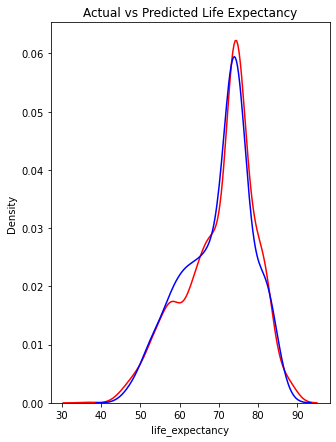

In [17]:
import seaborn as sns
plt.figure(figsize = (5, 7))

ax = sns.distplot(y, hist = False, color = "r", label = "Actual Value")
sns.distplot(y_pred, hist = False, color = "b", label = "Predicted Values" , ax=ax)

plt.title ("Actual vs Predicted Life Expectancy")

plt.show()
plt.close()
                  

In [18]:
model.feature_importances_

array([0.00567801, 0.11419941, 0.03375136, 0.00576889, 0.00333345,
       0.01639733, 0.14112717, 0.00688729, 0.00751634, 0.19277771,
       0.12560623, 0.01580537, 0.33042602, 0.00072543])

In [21]:
print(x.columns)

Index(['year_', 'adult_mortality', 'population_', 'under_five_deaths',
       'measles', 'gdp', 'hiv_aids', 'bmi', 'polio', 'basic_sanitation',
       'drinking_water', 'emissions', 'sani_service', 'Developing'],
      dtype='object')


<BarContainer object of 14 artists>

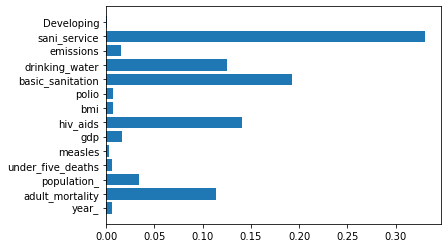

In [25]:
plt.barh(x.columns, model.feature_importances_)